# Chapter 6 - Decision Tree

## Making Predictions

let's take a look at an example to see how decision trees make predictions.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dtree = DecisionTreeClassifier(max_depth=2)

In [5]:
dtree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

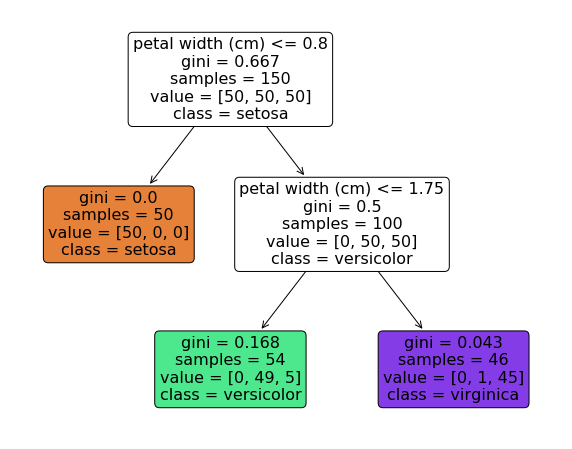

In [7]:
plt.figure(figsize=(10,8))
plot_tree(dtree, filled=True, fontsize=16, class_names=iris['target_names'], feature_names=iris.feature_names[2:], rounded=True)
plt.show()

A Decision tree model creates a tree graph and traverses it's nodes to make a decion. leaf nodes are the final decisions, while others are question nodes. In scikit-learn implementation of decision trees(CART algorithm), trees must be binary, which mean the question nodes have yes/no answers. some other algorithms let some nodes to have more than two childs.<br>
In the grapgh above, samples field reffers to number of training instances that end up in a node. value field is number of instances of each class in that node. gini is a measure of impurity for that node, which computes a ratio of incorrect instaces in a node. Finally, the class field, is the prediction made by a node.<br>
The followin equation shows how the <it>gini</it> score $G_i$ of the $i^{th}$ node is computed.
$$G_{i}=1-\sum_{k=1}^{n} p_{i, k}^{2}$$
- In this equation, $p_{i,k}$ is the ratio of class $k$ instaces among the training instances in the $i^{th}$ node.

In this example, the depth-2 left node has a <it>gini</it> score equal to $1-(0/54)^2-(49/54)^2-(5/554)^2=0.168$.

Decision tree can estimate a probability for each input. First, it finds the leaf that the input belongs to, and then computes ratio of training instances of each class to all training instances in that leaf, which gives the probability for each class.

In [8]:
dtree.predict([[5, 1.5]])

array([1])

In [9]:
dtree.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## The CART Training Algorithm

The <i>Classification and Regression Tree</i> (CART), used by Scikit-Learn, works by  first splitting the training set into two subsets using a feature $k$ and a threshold $t_k$. It chooses these two parameters in a way that produces the purest subsets. The cost function used in this algorithm is defined as follows:<br>
<br>
$$\begin{array}{l}
J\left(k, t_{k}\right)=\frac{m_{\mathrm{left}}}{m} G_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m} G_{\mathrm{right}} \\
\text { where }\left\{\begin{array}{l}
G_{1 \mathrm{eft} / \mathrm{right}} \text { measures the impurity of the left /right subset, } \\
m_{\mathrm{left} / \mathrm{right}} \text { is the number of instances in the left /right subset. }
\end{array}\right.
\end{array}$$
<br>
The algorith continues creating subsets using the same logic until it reaches the <code>max_depth</code> or if it cannot find a split that reduces the impurity.


## Gini Impurity or Entropy

Gini impurity is the default method of measuring impurity, but it can be changed to <i>Entropy</i> by setting the <code>criterion</code> hyperparameter to <code>"entropy"</code>.
Entropy concept comes from termodynamics where it approaches zero when molecules are still and well ordered. In Machine Learning , entropy is frequently used as an impurity measure: a set's entropy is zero when it contains instances of only one class. Equation 3 show the deifinition of the entropy for the $i^{th}$ node.
<br>
$$H_{i}=-\sum_{k=1 \atop p_{i, k} \neq 0}^{n} p_{i, k} \log _{2}\left(p_{i, k}\right)$$
In our example, the depth-2 left node in graph above, has an entropy equal to $-\frac{49}{54} \log _{2}\left(\frac{49}{54}\right)-\frac{5}{54} \log _{2}\left(\frac{5}{54}\right) \approx 0.445$.<br>
Entropy and Gini impurity measures usually end up in a similar tree. However, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce a more balanced tree.

## Regularization Hyperparameters

### parametric and nonparametric models

A parametic models, such as a linear model, make many assumptions about training instances, so it has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting.
On the other hand, a nonparametric model, like a decision tree, makes very few assumptions about the training instances,  so the number of parameters are not predetermined prior to training. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very tightly; indeed, most likely overfitting it. To avoid overfitting, we need to restrict the decision tree's freedom in training.

### Decision Tree Regulariztion Hyperparameters

mehhhh...

## Regression

Decision tree regression works much like the classification, but instead of predicting a class for each node, it predicts a vlaue at each leaf node. This predicted value is the average of all training instaces in that leaf. The CART algorithm works mostly the same way as earlier, except that instead of trying to minimize impurity in each split, it now tries to split the training set in a way that minimizes the MSE.
$$J\left(k, t_{k}\right)=\frac{m_{\mathrm{left}}}{m} \mathrm{MSE}_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m} \mathrm{MSE}_{\mathrm{right}} \text { where }\left\{\begin{array}{l}
\mathrm{MSE}_{\text {node }}=\sum_{i \in \text { node }}\left(\hat{y}_{\text {node }}-y^{(i)}\right)^{2} \\
\hat{y}_{\text {node }}=\frac{1}{m_{\text {node }}} \sum_{i \in \text { node }} y^{(i)}
\end{array}\right.$$<br>
A Decision tree regressor, just like tree classification, is prone to overfitting if used without any regularizations.

In [ ]:
DecisionTreeClassifier(presort=)